In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/multi_agent_sim")
from multi_agent_sim import MultiAgentSim

In [2]:
infection_dynamics_params = {
    'forward_gen_alpha': 8,
    'forward_gen_beta_hyperparams': (5,5),
    'detectability_curve_type': 'optimistic',
    'self_reporting_multiplier': 0.8,
    'self_reporting_delay': 3,
    'init_infection_rate': 0.001,
    'use_deterministic_infection_counts': True,
}

social_network_params_high_var = {
    'location_vec_dim': 2,
    'network_gamma': 3,
    'daily_contacts_distn_type': 'negative_binomial',
    'neg_bin_r': 2,
    'neg_bin_p_hyperparams': (2,3),
}

n_agents = 1000
main_params = {
    'n_agents': 1000,
    'use_contact_tracing': True,
    'use_adaptive_testing': True,
    'use_surveillance_testing': True
}

ct_params = {
    'ct_recall_window': 8,
    'ct_delay_distribution': [1/3,1/3,1/3], # uniform over 0, 1, 2 days delay
    'ct_recall_rate': 0.5
}

at_params = {
    'at_delay_distribution': [1/5] * 5,
    'at_net_size_contact_multiplier': 10,
    'at_recall_rate': 0.8
}

st_params = {
    'st_testing_window': 3,
    'st_missed_test_rate': 0.1
}

def init_high_var_sim(R0):
    social_network_params_high_var['neg_bin_r'] = R0 / 0.9
    return MultiAgentSim(main_params, infection_dynamics_params, social_network_params_high_var, 
                         ct_params, at_params, st_params)

social_network_params_low_var = {
    'location_vec_dim': 2,
    'network_gamma': 3,
    'daily_contacts_distn_type': 'negative_binomial',
    'neg_bin_r': 2,
    'neg_bin_p_hyperparams': (5,6),
}

def init_low_var_sim(R0):
    social_network_params_low_var['neg_bin_r'] = R0 / 0.9
    return MultiAgentSim(main_params, infection_dynamics_params, social_network_params_low_var, 
                         ct_params, at_params, st_params)

# we'll look at the low-variance sim with R0 = 3 and see how outbreaks occur as p varies

In [3]:
def init_sim(recall_rate):
    ct_params['ct_recall_rate'] = recall_rate
    social_network_params_high_var['neg_bin_r'] = 3 / 0.9
    return MultiAgentSim(main_params, infection_dynamics_params, social_network_params_high_var, 
                         ct_params, at_params, st_params)

def sample_trajectory(recall_rate):
    sim = init_sim(recall_rate)
    infection_counts = [len(sim.infection.get_cum_infected_agent_ids())]
    for _ in range(7*12):
        sim.step()
        infection_counts.append(len(sim.infection.get_cum_infected_agent_ids()))
    return infection_counts


recall_rates_to_try = [0,0.1,0.2,0.3,0.4,0.5]
ntrajectories = 10

trajectories = {}

from datetime import datetime

for recall_rate in recall_rates_to_try:
    print("Starting recall_rate {}".format(recall_rate))
    print("Timestamp: {}\n".format(datetime.now()))
    trajectories[recall_rate] = []
    for _ in range(ntrajectories):
        trajectories[recall_rate].append(sample_trajectory(recall_rate))

Starting recall_rate 0
Timestamp: 2020-11-17 15:03:40.872581

Starting recall_rate 0.1
Timestamp: 2020-11-17 15:06:40.864491

Starting recall_rate 0.2
Timestamp: 2020-11-17 15:09:45.167474

Starting recall_rate 0.3
Timestamp: 2020-11-17 15:12:48.620537

Starting recall_rate 0.4
Timestamp: 2020-11-17 15:15:52.396495

Starting recall_rate 0.5
Timestamp: 2020-11-17 15:18:54.024891



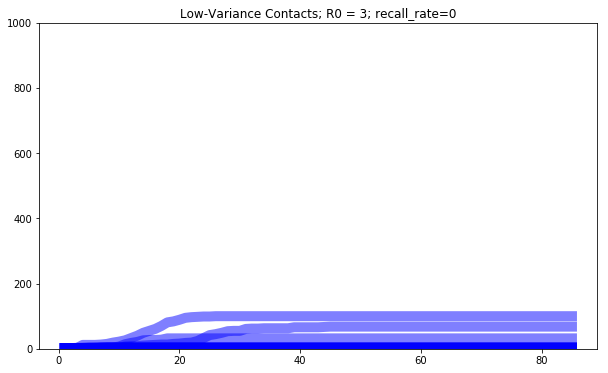

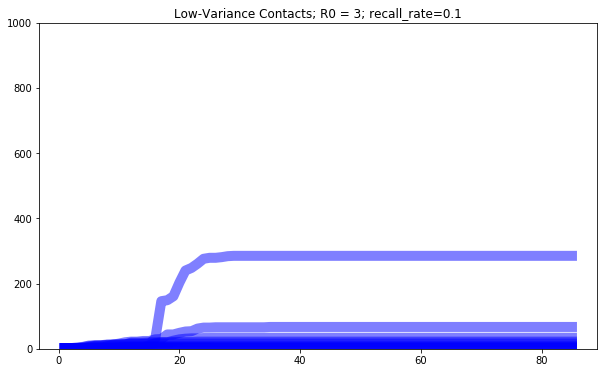

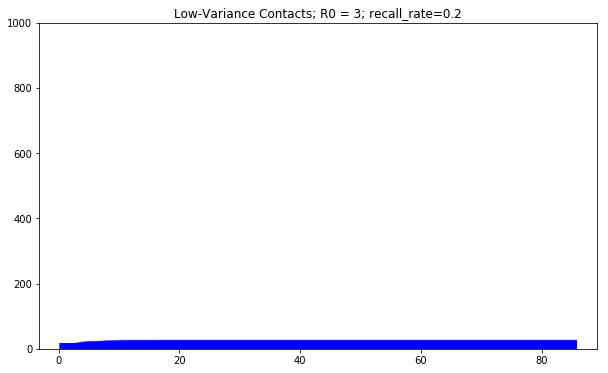

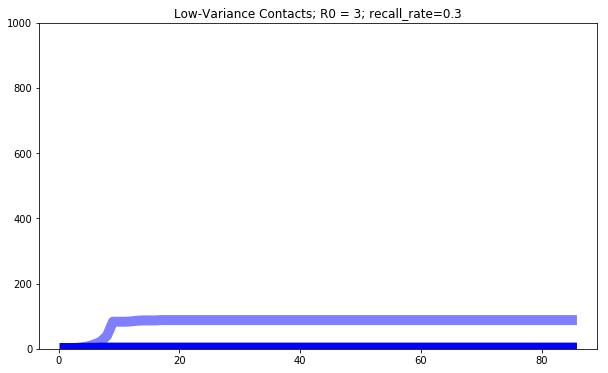

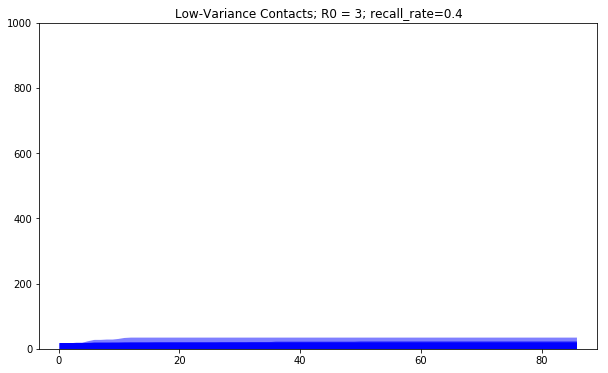

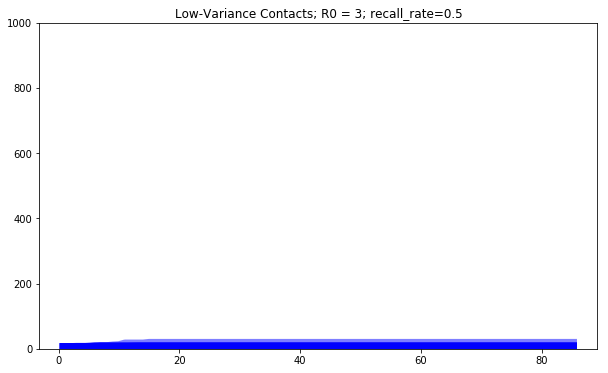

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,32))

for rate in recall_rates_to_try:#+more_recall_rates:
    plt.figure(figsize=(10,6))
    trajs = trajectories[rate]

    xs = list(range(1, len(trajs[0]) + 1))

    for traj in trajs:
        plt.plot(xs, traj, linewidth=10, alpha=0.5, color='blue')
    plt.ylim([0,1000])
    plt.title("Low-Variance Contacts; R0 = 3; recall_rate={}".format(rate))
    plt.show()




In [9]:
more_recall_rates = [0.6,0.7,0.8,0.9,1]
for recall_rate in more_recall_rates:
    print("Starting recall_rate {}".format(recall_rate))
    print("Timestamp: {}\n".format(datetime.now()))
    trajectories[recall_rate] = []
    for _ in range(ntrajectories):
        trajectories[recall_rate].append(sample_trajectory(recall_rate))

Starting recall_rate 0.6
Timestamp: 2020-10-15 10:57:20.308460

Starting recall_rate 0.7
Timestamp: 2020-10-15 11:01:10.482516

Starting recall_rate 0.8
Timestamp: 2020-10-15 11:04:50.619932

Starting recall_rate 0.9
Timestamp: 2020-10-15 11:08:37.415134

Starting recall_rate 1
Timestamp: 2020-10-15 11:12:12.644403



# hmm let's look at sensitivity to recall_rate for the low-variance sim when R0 = 2

In [13]:
def init_sim(recall_rate):
    ct_params['ct_recall_rate'] = recall_rate
    social_network_params_high_var['neg_bin_r'] = 2 / 0.9
    return MultiAgentSim(main_params, infection_dynamics_params, social_network_params_high_var, ct_params)

def sample_trajectory(recall_rate):
    sim = init_sim(recall_rate)
    infection_counts = [len(sim.infection.get_cum_infected_agent_ids())]
    for _ in range(7*12):
        sim.step()
        infection_counts.append(len(sim.infection.get_cum_infected_agent_ids()))
    return infection_counts


trajectories2 = {}

from datetime import datetime

for recall_rate in recall_rates_to_try + more_recall_rates:
    print("Starting recall_rate {}".format(recall_rate))
    print("Timestamp: {}\n".format(datetime.now()))
    trajectories2[recall_rate] = []
    for _ in range(ntrajectories):
        trajectories2[recall_rate].append(sample_trajectory(recall_rate))

Starting recall_rate 0
Timestamp: 2020-10-15 12:22:20.550485

Starting recall_rate 0.1
Timestamp: 2020-10-15 12:27:39.309137

Starting recall_rate 0.2
Timestamp: 2020-10-15 12:32:27.339323

Starting recall_rate 0.3
Timestamp: 2020-10-15 12:36:26.054863

Starting recall_rate 0.4
Timestamp: 2020-10-15 12:40:28.190413

Starting recall_rate 0.5
Timestamp: 2020-10-15 12:43:59.337305

Starting recall_rate 0.6
Timestamp: 2020-10-15 12:47:28.517487

Starting recall_rate 0.7
Timestamp: 2020-10-15 12:51:04.706913

Starting recall_rate 0.8
Timestamp: 2020-10-15 12:54:15.555418

Starting recall_rate 0.9
Timestamp: 2020-10-15 12:57:25.236557

Starting recall_rate 1
Timestamp: 2020-10-15 13:00:35.527416



# below here are trajectories w/o any interventions

In [3]:
def sample_high_var_trajectory(R0):
    sim = init_high_var_sim(R0)
    infection_counts = [len(sim.infection.get_cum_infected_agent_ids())]
    for _ in range(7*12):
        sim.step()
        infection_counts.append(len(sim.infection.get_cum_infected_agent_ids()))
    return infection_counts

def sample_low_var_trajectory(R0):
    sim = init_low_var_sim(R0)
    infection_counts = [len(sim.infection.get_cum_infected_agent_ids())]
    for _ in range(7*12):
        sim.step()
        infection_counts.append(len(sim.infection.get_cum_infected_agent_ids()))
    return infection_counts

In [4]:
from datetime import datetime
print(datetime.now())

2020-10-07 15:26:03.027538


In [5]:
import time
print(time.time())

1602098184.1280391


In [5]:
R0_vals = [0.5, 1, 2, 3]
ntrajectories = 10

low_var_trajectories = {}
high_var_trajectories = {}

from datetime import datetime

for R0 in R0_vals:
    print("Starting R0 {}".format(R0))
    print("Timestamp: {}\n".format(datetime.now()))
    low_var_trajectories[R0] = []
    high_var_trajectories[R0] = []
    for _ in range(ntrajectories):
        low_var_trajectories[R0].append(sample_low_var_trajectory(R0))
        high_var_trajectories[R0].append(sample_high_var_trajectory(R0))

Starting R0 0.5
Timestamp: 2020-10-07 15:26:09.625791

Starting R0 1
Timestamp: 2020-10-07 15:31:55.382366

Starting R0 2
Timestamp: 2020-10-07 15:38:33.082700

Starting R0 3
Timestamp: 2020-10-07 15:48:24.935603



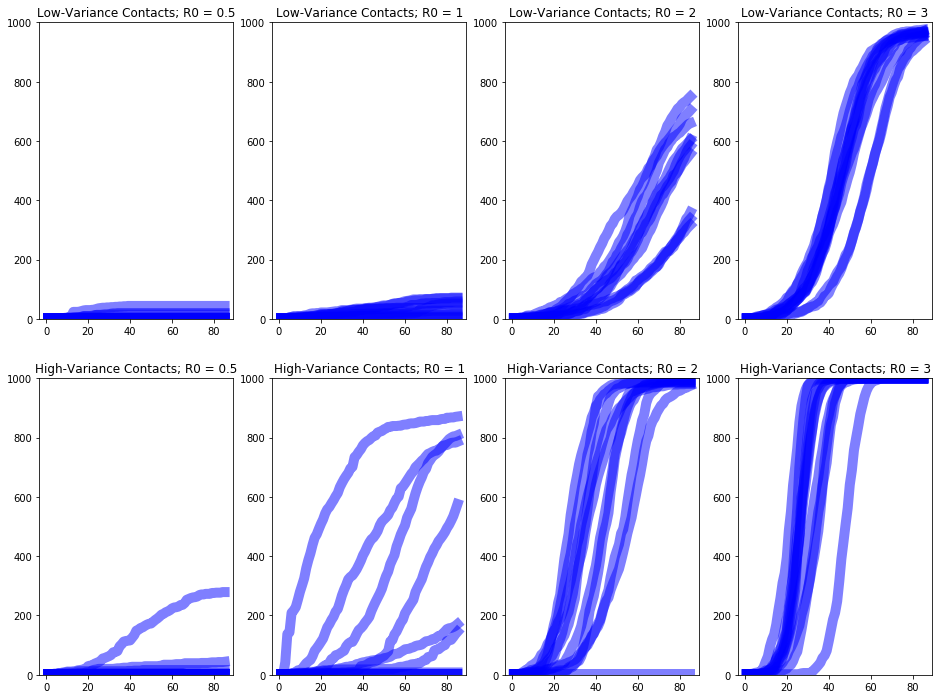

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,12))

fig_idx = 241
for R0 in R0_vals:
    plt.subplot(fig_idx)
    trajectories = low_var_trajectories[R0]

    xs = list(range(1, len(trajectories[0]) + 1))

    for traj in trajectories:
        plt.plot(xs, traj, linewidth=10, alpha=0.5, color='blue')
    plt.ylim([0,1000])
    plt.title("Low-Variance Contacts; R0 = {}".format(R0))
    fig_idx += 1

for R0 in R0_vals:
    plt.subplot(fig_idx)
    trajectories = high_var_trajectories[R0]

    xs = list(range(1, len(trajectories[0]) + 1))

    for traj in trajectories:
        plt.plot(xs, traj, linewidth=10, alpha=0.5, color='blue')
    plt.ylim([0,1000])
    plt.title("High-Variance Contacts; R0 = {}".format(R0))
    fig_idx += 1

plt.show()

Text(0,0.5,'Cumulative Infections')

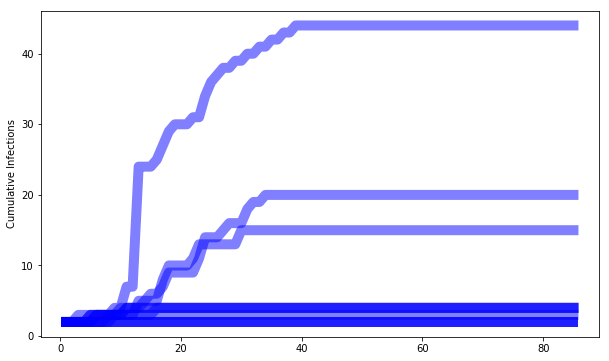

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))

R0 = 0.5
trajectories = low_var_trajectories[R0]

xs = list(range(1, len(trajectories[0]) + 1))

for traj in trajectories:
    plt.plot(xs, traj, linewidth=10, alpha=0.5, color='blue')

plt.ylabel("Cumulative Infections")

Text(0,0.5,'Cumulative Infections')

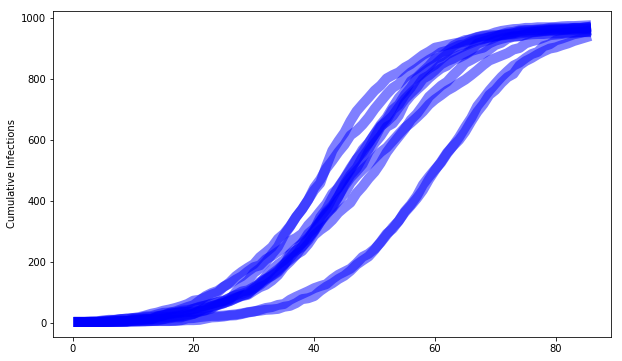

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))

R0 = 3
trajectories = low_var_trajectories[R0]

xs = list(range(1, len(trajectories[0]) + 1))

for traj in trajectories:
    plt.plot(xs, traj, linewidth=10, alpha=0.5, color='blue')

plt.ylabel("Cumulative Infections")

In [22]:
infection_counts

[2,
 2,
 2,
 3,
 5,
 6,
 6,
 8,
 9,
 10,
 12,
 13,
 13,
 14,
 20,
 21,
 23,
 25,
 25,
 26,
 28,
 31,
 34,
 35,
 35,
 38,
 40,
 42,
 45,
 47,
 51,
 56,
 66,
 71,
 80,
 87,
 92,
 101,
 112,
 117,
 125,
 142,
 154,
 179,
 189,
 207,
 222,
 245,
 264,
 282,
 315,
 349,
 381,
 415,
 444,
 470,
 507,
 533,
 557,
 587,
 619,
 655,
 673,
 696,
 728,
 751,
 779,
 800,
 822,
 835,
 850,
 866,
 874,
 889,
 903,
 910,
 916,
 920,
 924,
 927,
 931,
 934,
 939,
 944,
 947,
 948,
 948,
 950,
 951,
 953,
 954,
 954,
 954,
 956,
 956,
 956,
 957,
 957,
 958,
 958,
 959,
 959,
 959,
 959,
 959,
 959,
 959,
 959,
 959,
 959,
 959,
 959,
 959]